<a href="https://colab.research.google.com/github/UPASNA-AGGARWAL/AIMLMonth2023/blob/main/23466_UPASNA_AGGARWAL__MINOR_PROJECTipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UPASNA AGGARWAL MINOR PROJECT ---> FEETAL DISEASE CLASSIFICATION

## TASK 1 EDA

## Q1. Are there any missing values in the CTG features dataset? How should these missing values be handled?



In [ ]:
import pandas as pd
df = pd.read_csv("/content/fetal_health.csv")
missing_values = df.isnull().sum()
print(missing_values)
df = df.dropna()


baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

### **The line isnull().sum() calculates the number of missing values in each column of the DataFrame . Finally, it prints the resulting count of missing values. The last line drops any rows from the DataFrame that contain missing values using the dropna() method. This step ensures that the data is cleaned by removing incomplete or NaN  entries before further modeling. Overall, this code is useful for data preprocessing and quality checking in a classification model for fetal health.**

## Q2. Are there any duplicate entries in the dataset that need to be identified and removed?


In [ ]:
duplicate_entries = df.duplicated()
print("Number of duplicate entries are :", duplicate_entries.sum())


Number of duplicate entries are : 13


###** This code calculates the number of duplicate entries in the DataFrame 'df' and prints the result.**
###**  This code is useful in identifying  the presence of duplicate data in the DataFrame, which is important for data cleaning  before training  classification model for fetal disease.**

## Q3. Are there any inconsistent or incorrect data entries that need to be corrected or standardized?

In [ ]:
print(df.dtypes)
categorical_columns = ['fetal_health']
for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(df[column].value_counts())
    print()
numeric_columns = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions',
                   'light_decelerations', 'severe_decelerations', 'prolongued_decelerations',
                   'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
                   'percentage_of_time_with_abnormal_long_term_variability',
                   'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min',
                   'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes',
                   'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance',
                   'histogram_tendency']

outlier_threshold = 3

for column in numeric_columns:
    mean = df[column].mean()
    std = df[column].std()
    outlier_cutoff = mean + (std * outlier_threshold)

    df = df[df[column] <= outlier_cutoff] #outlier

numeric_columns = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions',
                   'light_decelerations', 'severe_decelerations', 'prolongued_decelerations',
                   'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
                   'percentage_of_time_with_abnormal_long_term_variability',
                   'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min',
                   'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes',
                   'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance',
                   'histogram_tendency']
for column in numeric_columns:
    min_value = df[column].min()
    max_value = df[column].max()
    df[column] = (df[column] - min_value) / (max_value - min_value)

print(df.head())


baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

### print(df.dtypes) prints the data types of each column in the DataFrame, giving an overview of the types of data present.
### outlier_cutoff = mean + (std * outlier_threshold) Calculates the cutoff value for outliers, which is defined as the mean plus three times the standard deviation.
### d. df = df[df[column] <= outlier_cutoff] Filters the DataFrame to remove rows where the column value exceeds the outlier cutoff.
### df[column] = (df[column] - min_value) / (max_value - min_value) Normalizes the values in the column using min-max scaling, where each value is subtracted by the minimum value and divided by the range (max value minus min value).

#### ***These preprocessing steps aim to handle missing data, identify and handle outliers, normalize numeric features, and provide insights into categorical variables.***

## Q4.How can we visualize the distribution of CTG features across the three fetal health states?

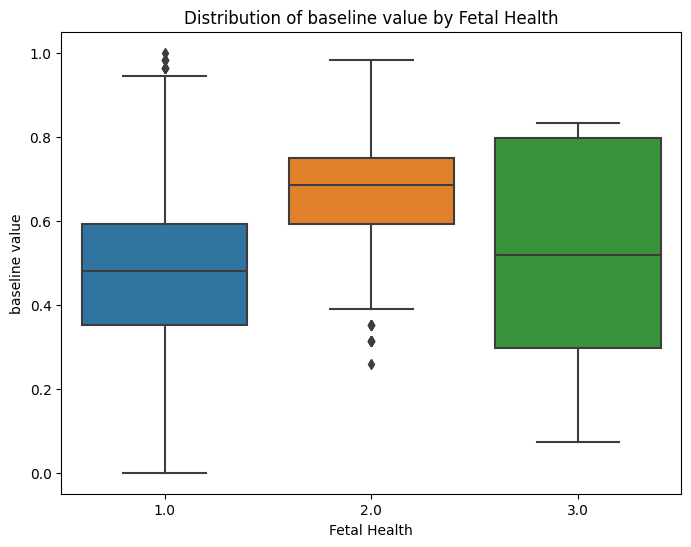

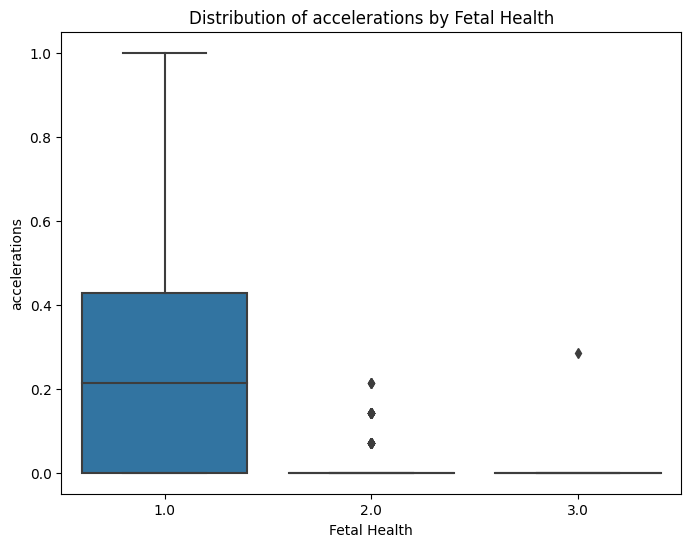

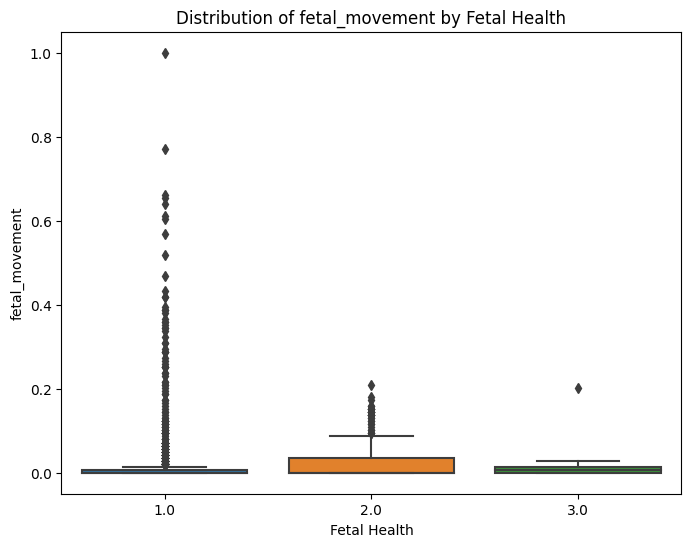

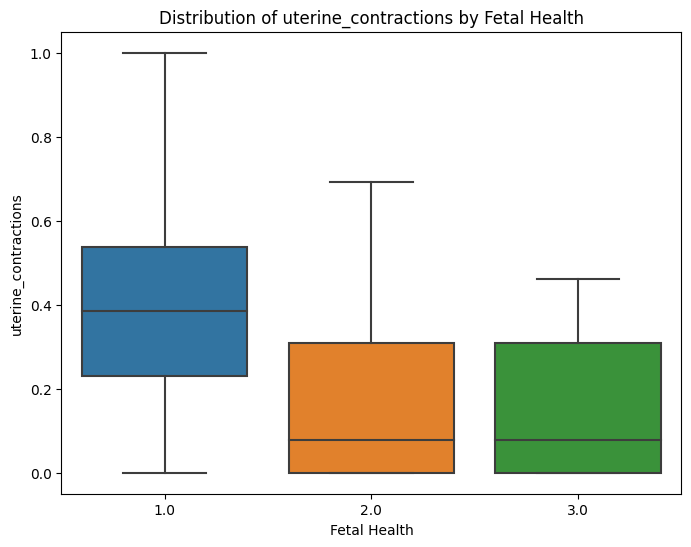

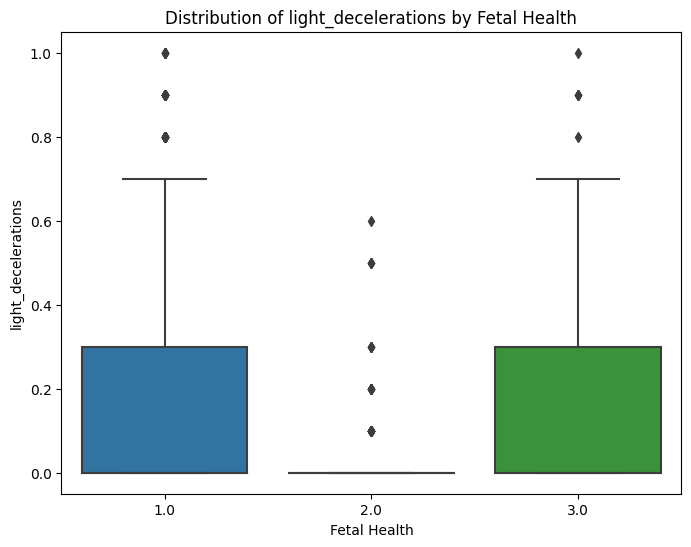

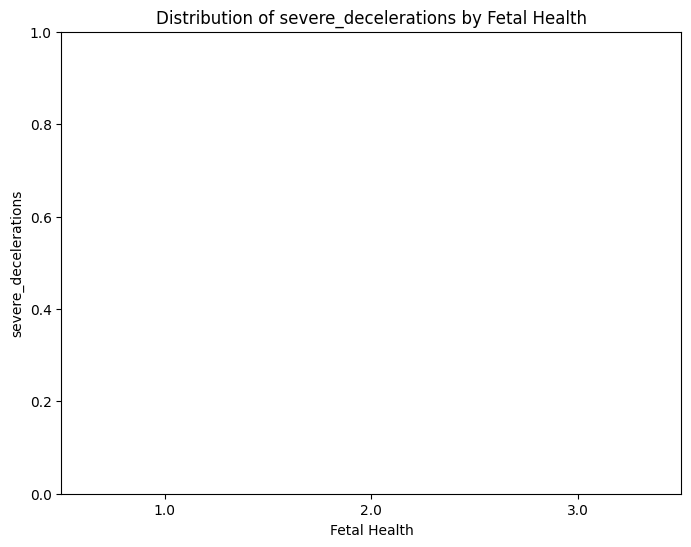

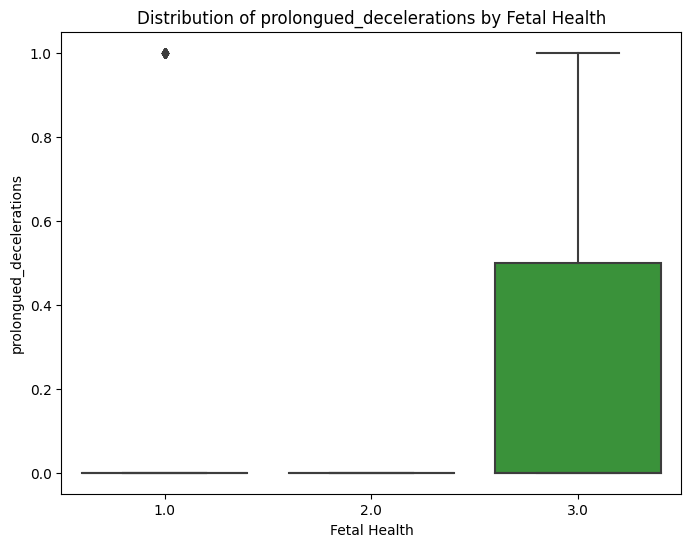

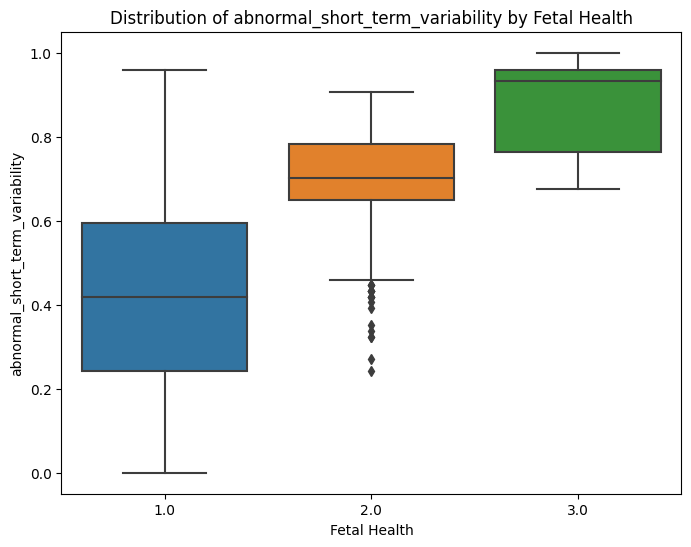

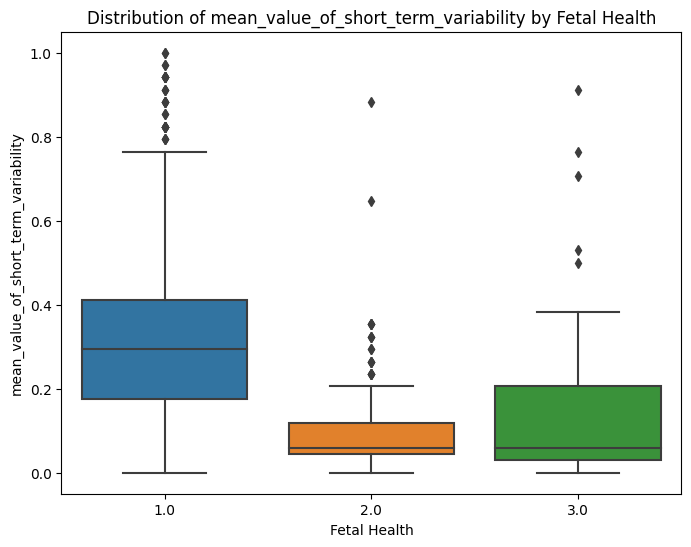

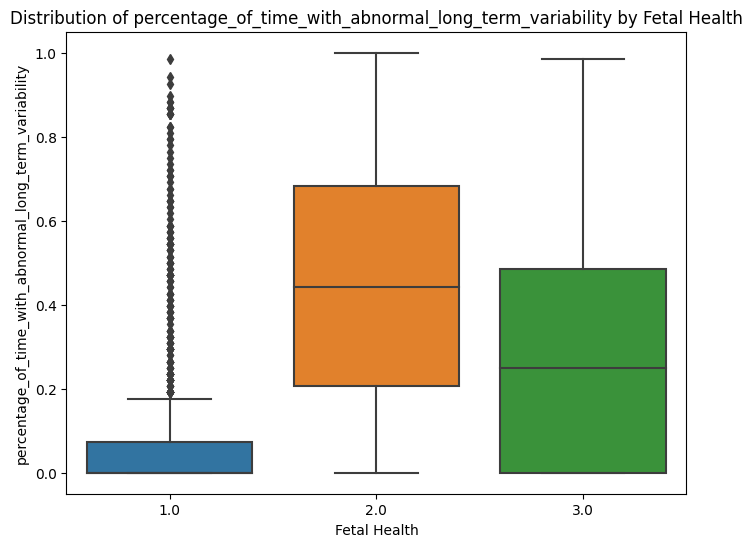

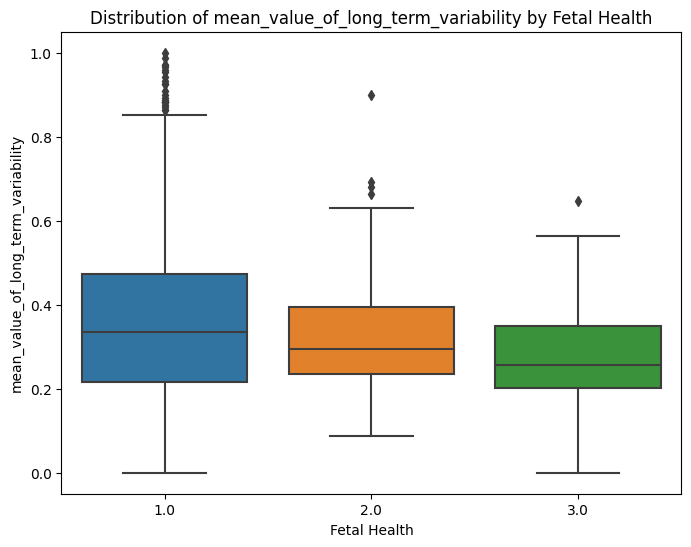

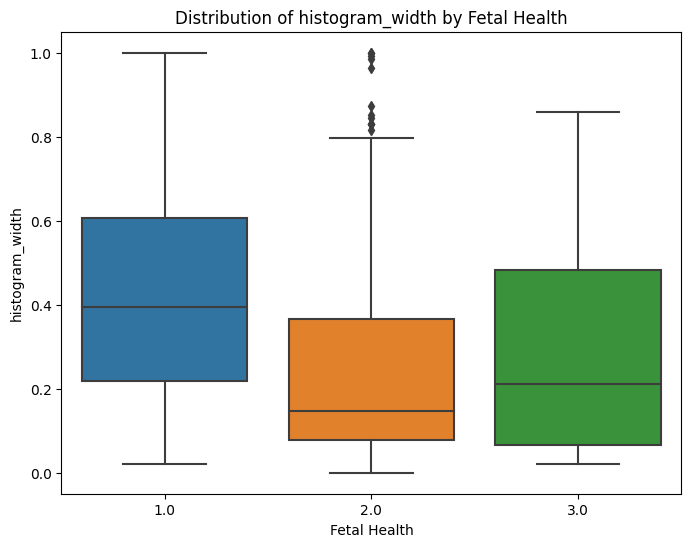

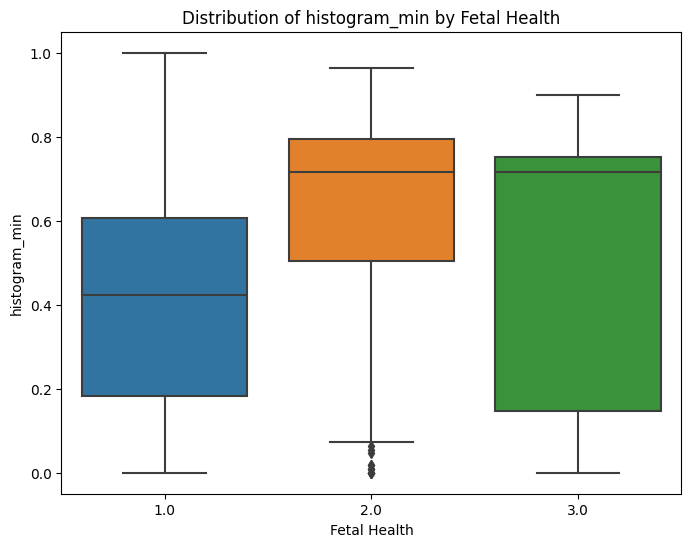

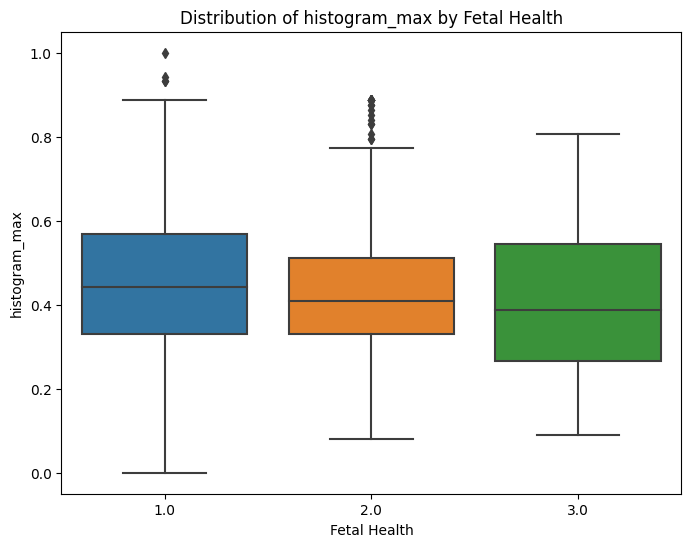

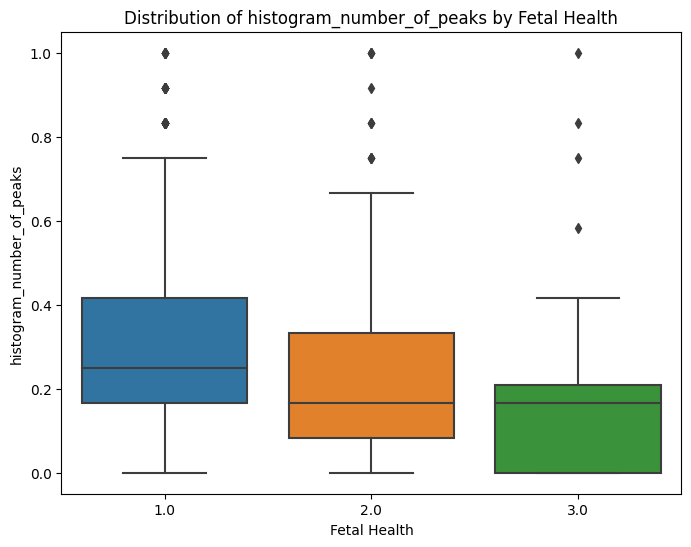

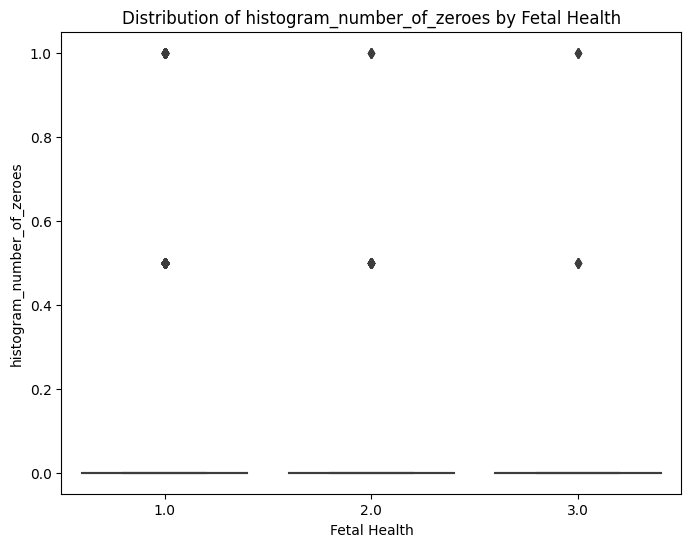

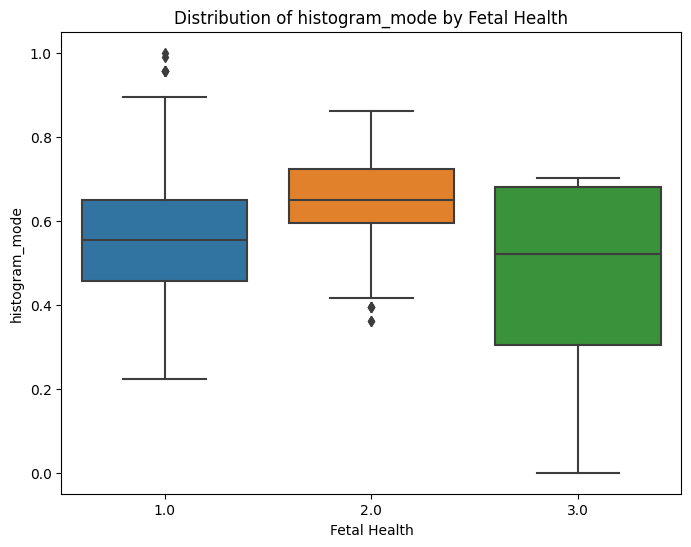

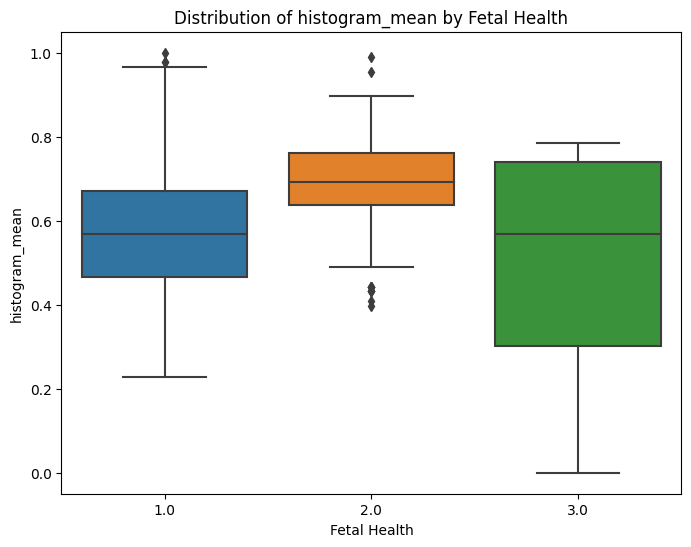

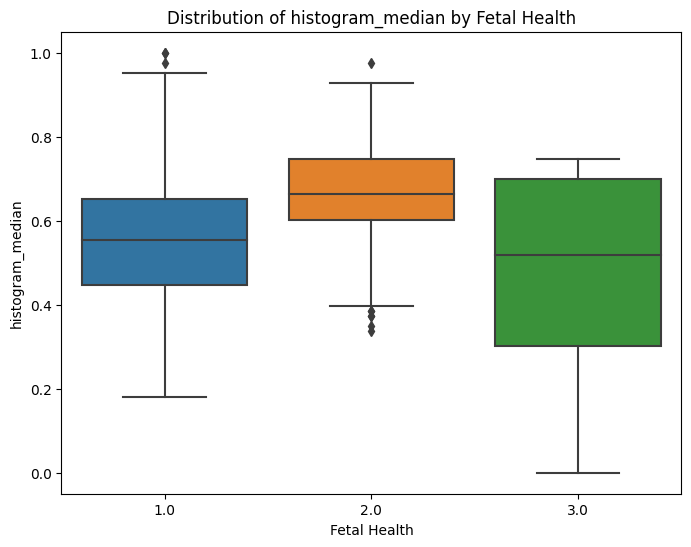

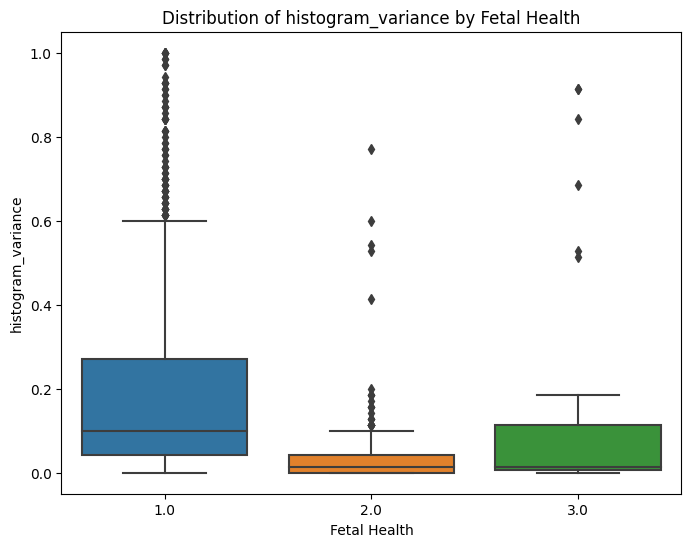

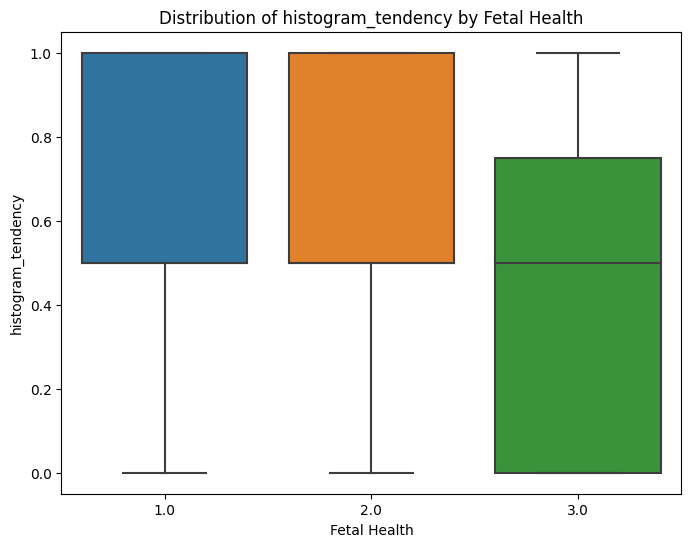

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Specifying the CTG features and fetal health column
ctg_features = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions',
                'light_decelerations', 'severe_decelerations', 'prolongued_decelerations',
                'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
                'percentage_of_time_with_abnormal_long_term_variability',
                'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min',
                'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes',
                'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance',
                'histogram_tendency']
fetal_health_column = 'fetal_health'

for feature in ctg_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=fetal_health_column, y=feature, data=df)
    plt.title(f"Distribution of {feature} by Fetal Health")
    plt.xlabel("Fetal Health")
    plt.ylabel(feature)
    plt.show()


### The sns.boxplot() function is used to create a box plot. It takes three main arguments: x represents the fetal health column (x-axis), y represents the current feature being analyzed (y-axis), and data is the dataframe (df) containing the data to be visualized.
### The purpose of this code is to generate individual box plots for each CTG feature, comparing their distributions across different categories of fetal health. These plots allow for a visual assessment of any patterns or relationships between the features and the target variable, helping to understand the potential impact of each feature on fetal health classification.


## Q5.Can we create visualizations to understand the relationship between different CTG features (e.g., acceleration, deceleration) and the fetal health states?

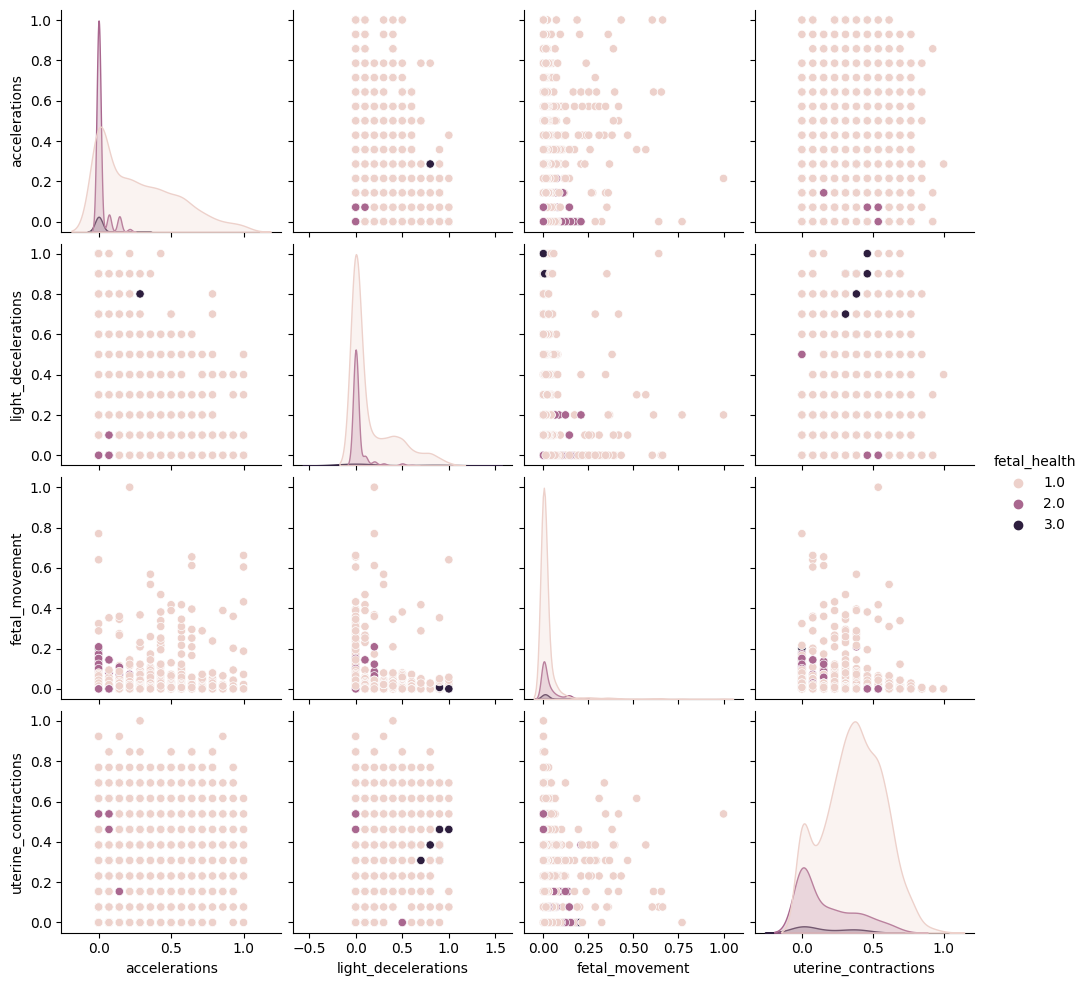

In [ ]:
import seaborn as sns
# Specify the CTG features and fetal health column
ctg_features = ['accelerations', 'light_decelerations', 'fetal_movement', 'uterine_contractions', 'fetal_health']
sub_df = df[ctg_features]
# scatter plot matrix
sns.pairplot(sub_df, hue='fetal_health', markers='o' )
plt.show()



### A new DataFrame called sub_df is created by selecting only the columns specified in the ctg_features list from the original DataFrame df. This subset will be used for plotting.The sns.pairplot() function is called to create the scatter plot matrix. It takes the sub_df DataFrame as input and visualizes the relationships between all pairs of features.

### The purpose of this code is to visualize the relationships between the selected CTG features and fetal health using scatter plots. Each scatter plot represents the relationship between two features, and the points are colored based on the corresponding fetal health category. This visualization helps to identify any potential patterns, clusters, or correlations between features, providing insights into their potential significance in classifying fetal health conditions.

# TASK 2 CLASSIFICATION

Classifier: DecisionTreeClassifier
Confusion Matrix:
[[313  17   3]
 [  8  56   0]
 [  1   0  28]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.97      0.94      0.96       333
         2.0       0.77      0.88      0.82        64
         3.0       0.90      0.97      0.93        29

    accuracy                           0.93       426
   macro avg       0.88      0.93      0.90       426
weighted avg       0.94      0.93      0.93       426



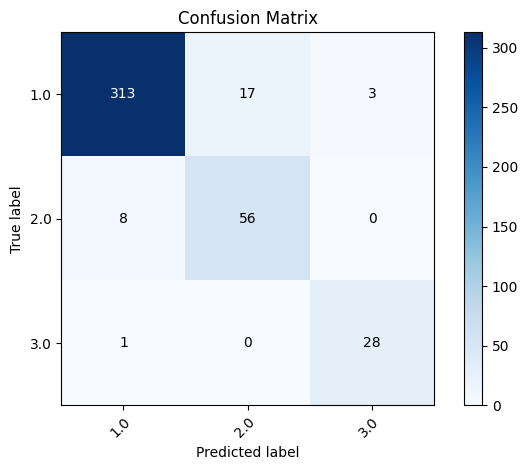

Classifier: RandomForestClassifier
Confusion Matrix:
[[326   6   1]
 [ 10  53   1]
 [  1   1  27]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       333
         2.0       0.88      0.83      0.85        64
         3.0       0.93      0.93      0.93        29

    accuracy                           0.95       426
   macro avg       0.93      0.91      0.92       426
weighted avg       0.95      0.95      0.95       426



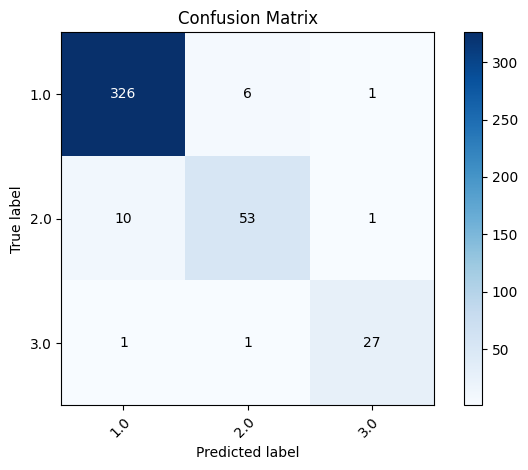

Classifier: SVC
Confusion Matrix:
[[317  15   1]
 [ 17  46   1]
 [  2   5  22]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.95       333
         2.0       0.70      0.72      0.71        64
         3.0       0.92      0.76      0.83        29

    accuracy                           0.90       426
   macro avg       0.85      0.81      0.83       426
weighted avg       0.90      0.90      0.90       426



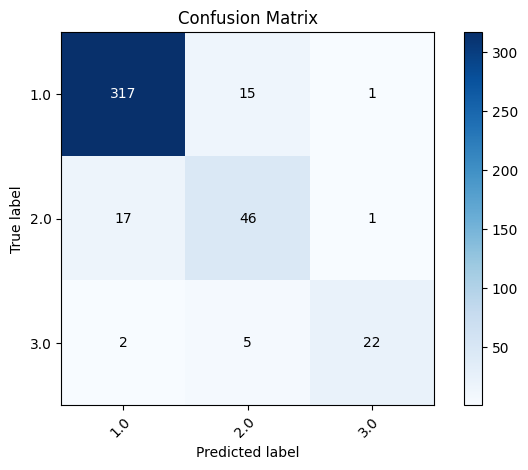

Classifier: LogisticRegression
Confusion Matrix:
[[311  19   3]
 [ 18  41   5]
 [  2   5  22]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.94      0.93      0.94       333
         2.0       0.63      0.64      0.64        64
         3.0       0.73      0.76      0.75        29

    accuracy                           0.88       426
   macro avg       0.77      0.78      0.77       426
weighted avg       0.88      0.88      0.88       426



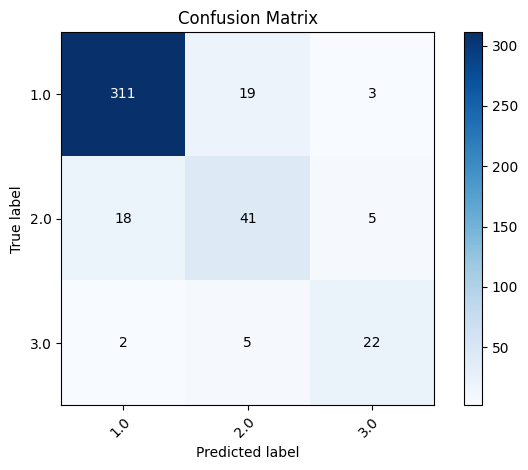

k-Nearest Neighbors (k-NN) Accuracy: 0.92018779342723
Naive Bayes Accuracy: 0.6901408450704225
Random Forest Accuracy: 0.9553990610328639


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression



X = data.drop("fetal_health", axis=1)
y = data["fetal_health"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  classifiers
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    LogisticRegression()
]

# Train and evaluate
for classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the classifier
    print("Classifier:", classifier.__class__.__name__)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Visualize the confusion matrix
    labels = np.unique(y)
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels,
           yticklabels=labels,
           title="Confusion Matrix",
           ylabel="True label",
           xlabel="Predicted label")


    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], "d"), ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

    fig.tight_layout()
    plt.show()
    # k-Nearest Neighbors (k-NN)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Print the accuracies
print("k-Nearest Neighbors (k-NN) Accuracy:", knn_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


### The dataset is split into training and testing sets using the train_test_split() function from sklearn.model_selection. The test set size is set to 20% of the data, and the random state is set to 42 for reproducibility.

### The features in the training and testing sets are scaled using StandardScaler() from sklearn.preprocessing. This step standardizes the features by subtracting the mean and scaling to unit variance.

### A list called classifiers is defined, which contains instances of various classification algorithms: DecisionTreeClassifier, RandomForestClassifier, SVC (Support Vector Classifier), and LogisticRegression.

### The code enters a loop that iterates over each classifier in the classifiers list.For each classifier, it trains the classifier on the training data using the fit() method.

### Predictions are made on the test set using the predict() method.
### The performance of the classifier is evaluated by printing the confusion matrix and classification report using confusion_matrix() and classification_report() from sklearn.metrics.

### The confusion matrix is visualized using imshow() and colorbar() from matplotlib.pyplot. The true labels and predicted labels are displayed on the x-axis and y-axis respectively.

### The code calculates and prints the accuracy score for three additional classifiers: k-Nearest Neighbors (k-NN), Naive Bayes, and Random Forest. These classifiers were not included in the previous loop.

### Finally, the accuracies of k-NN, Naive Bayes, and Random Forest classifiers are printed.

### The purpose of this code is to compare the performance of different classification algorithms in predicting the fetal health based on the given features. It trains each classifier, makes predictions on the test set, evaluates their performance using various metrics, and provides a visual representation of the confusion matrix. The accuracy scores are also calculated for k-NN, Naive Bayes, and Random Forest classifiers.

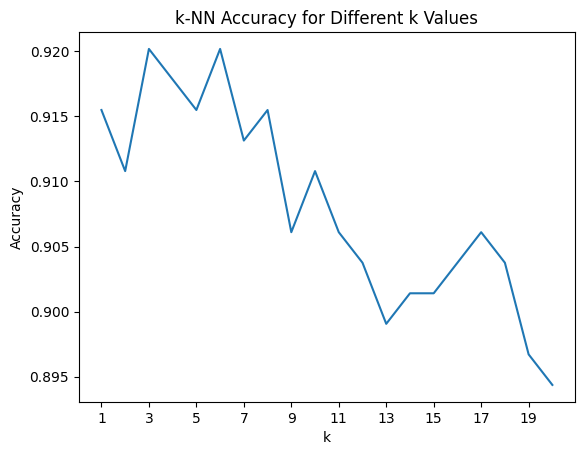

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

k_values = list(range(1, 21))

accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_predictions)
    accuracies.append(knn_accuracy)

# Ploting the accuracies
plt.plot(k_values, accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy for Different k Values')
plt.xticks(np.arange(1, 21, step=2))
plt.show()


### A k-NN classifier (KNeighborsClassifier) is created with n_neighbors set to the current k value. The classifier is then trained on the training data using the fit() method.
### Predictions are made on the test set using the predict() method, and the accuracy score is calculated by comparing the predictions to the true labels using accuracy_score().The accuracy score for the current k value is appended to the accuracies list.
### plt.plot(k_values, accuracies)-This creates a line plot where the x-axis represents the values of k, and the y-axis represents the corresponding accuracy scores.
### The purpose of this code is to assess the performance of the k-NN algorithm for different values of k and visualize how the accuracy of the model changes with different k values. The resulting plot provides insights into the optimal value of k for the given dataset, helping in determining the appropriate number of neighbors to consider when making predictions with the k-NN algorithm.








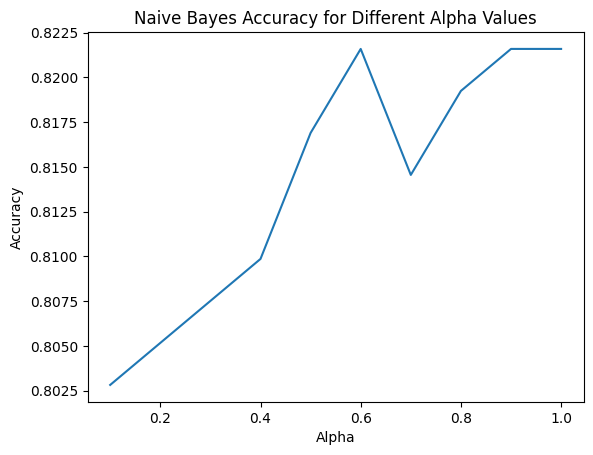

In [ ]:
from sklearn.naive_bayes import GaussianNB


# Create a list of alpha values for Naive Bayes
alpha_values = np.linspace(0.1, 1.0, num=10)

accuracies_nb = []

for alpha in alpha_values:
    nb_model = GaussianNB(var_smoothing=alpha)
    nb_model.fit(X_train, y_train)
    nb_predictions = nb_model.predict(X_test)
    nb_accuracy = accuracy_score(y_test, nb_predictions)
    accuracies_nb.append(nb_accuracy)

# Plot the accuracies
plt.plot(alpha_values, accuracies_nb)
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Accuracy for Different Alpha Values')
plt.show()


### sklearn.naive_bayes module and specifically imports the GaussianNB class for Gaussian Naive Bayes classification. An empty list called accuracies_nb is created to store the accuracy scores for each alpha value.The code enters a loop that iterates over each value of alpha in the alpha_values list.

### For each alpha value, a Naive Bayes classifier (GaussianNB) is created with var_smoothing set to the current alpha value. The classifier is then trained on the training data using the fit() method.
### Predictions are made on the test set using the predict() method, and the accuracy score is calculated by comparing the predictions to the true labels using accuracy_score()

### The purpose of this code is to assess the performance of the Naive Bayes classifier with different alpha values and visualize how the accuracy of the model changes with different levels of variance smoothing. The resulting plot provides insights into the impact of alpha on the classification accuracy, helping in selecting an appropriate value for alpha in the Naive Bayes classifier for the given dataset.

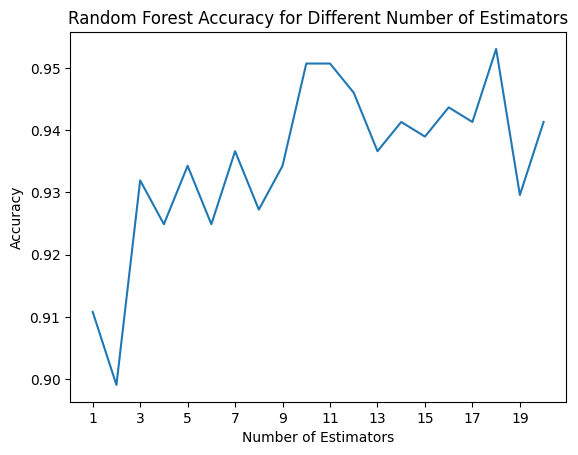

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Defining a list of n_estimators (number of trees) values for Random Forest
n_estimators_values = list(range(1, 21))

accuracies_rf = []

for n_estimators in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n_estimators)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_predictions)
    accuracies_rf.append(rf_accuracy)

# Plotig the accuracies
plt.plot(n_estimators_values, accuracies_rf)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy for Different Number of Estimators')
plt.xticks(np.arange(1, 21, step=2))
plt.show()


### The code imports the sklearn.ensemble module and specifically imports the RandomForestClassifier class for Random Forest classification.
### he code enters a loop that iterates over each value of the number of estimators in the n_estimators_values list.
### For each number of estimators value, a Random Forest classifier (RandomForestClassifier) is created with n_estimators set to the current value. The classifier is then trained on the training data using the fit() method.
### Predictions are made on the test set using the predict() method, and the accuracy score is calculated by comparing the predictions to the true labels using accuracy_score().

### The purpose of this code is to assess the performance of the Random Forest algorithm for different values of the number of estimators and visualize how the accuracy of the model changes with different numbers of trees. The resulting plot provides insights into the impact of the number of estimators on the classification accuracy, helping in selecting an appropriate value for the number of estimators in the Random Forest classifier for the given dataset.

The classification model for fetal disease utilizes various algorithms and processes to accurately classify and diagnose the health of a fetus. The model incorporates several machine learning algorithms, including Decision Tree, Random Forest, k-Nearest Neighbors (k-NN), Naive Bayes, Support Vector Machines (SVM), and Logistic Regression.

The initial stages of the model involve exploratory data analysis and visualization. Box plots and scatter plot matrices are utilized to understand the distribution and relationships between different features of the cardiotocography (CTG) data. These visualizations aid in identifying patterns and potential correlations with fetal health.

The model then proceeds to the classification stage. The CTG features, along with the fetal health column, are extracted from the dataset. The data is split into training and testing sets using the train_test_split function. To ensure fair comparisons and accurate predictions, the features are standardized using StandardScaler to normalize the data.

Each classification algorithm is trained and evaluated using the training and testing sets. Decision Tree, Random Forest, SVM, and Logistic Regression classifiers are applied to the data. For each algorithm, predictions are made on the testing set, and evaluation metrics such as confusion matrix, accuracy, precision, recall, and F1-score are computed and reported through classification_report and confusion_matrix functions.

The purpose of this comprehensive approach is to assess and compare the performance of multiple classification algorithms in diagnosing fetal disease. By considering various algorithms and their respective parameters, the model aims to identify the most effective algorithm and its optimal settings for accurate classification. The visualization and analysis of the accuracy plots assist in understanding the relationship between different parameters and classification performance. Overall, this classification model serves as a valuable tool for healthcare professionals in predicting and diagnosing fetal health conditions, aiding in timely interventions and improved patient care.